# <center>ENEM - pt. 14
<hr>

## <center>Inicialização
<hr>

In [1]:
from tcc_funcoes import *


=================================== Módulo importado com sucesso ===================================



In [3]:
dc_modelos_final = abre_arquivo_pickle('dc_modelos_final.pkl')

In [34]:
dc_feature_importance = {}

for algoritmo, dc_modelos in dc_modelos_final.items():

    dc_feature_importance[algoritmo] = {}

    for nome, modelo in dc_modelos.items():

        df = pd.DataFrame({
            'variavel': modelo.feature_names_in_,
            'importancia': modelo.feature_importances_
        })

        if algoritmo == 'xgb':
            colunas_xgb = modelo.feature_names_in_.tolist()
        if algoritmo == 'lgbm':
            colunas_lgbm = modelo.feature_names_in_.tolist()

        dc_feature_importance[algoritmo][nome] = df

In [36]:
dc_nome_lgbm = {}

for i, nome in enumerate(colunas_lgbm):
    dc_nome_lgbm[nome] = colunas_xgb[i]

for nome, df in dc_feature_importance['lgbm'].items():

        dc_feature_importance['lgbm'][nome]['variavel'] = df['variavel'].map(dc_nome_lgbm)

In [43]:
dc_feature_importance_ensemble = {}

for nome, df_xgb in dc_feature_importance['xgb'].items():

    df_lgbm = dc_feature_importance['lgbm'][nome]

    df_ensemble = pd.DataFrame({
        'variavel': df_xgb['variavel'],
        'importancia_xgb': df_xgb['importancia'],
        'importancia_lgbm': df_lgbm['importancia']
    })

    df_ensemble['rank_importancia_xgb'] = df_ensemble['importancia_xgb'].rank(ascending=False)
    df_ensemble['rank_importancia_lgbm'] = df_ensemble['importancia_lgbm'].rank(ascending=False)

    df_ensemble['rank_importancia_ensemble'] = (df_ensemble['rank_importancia_xgb'] + df_ensemble['rank_importancia_lgbm']) / 2

    df_ensemble.sort_values('rank_importancia_ensemble', inplace=True)

    df_ensemble.reset_index(drop=True, inplace=True)

    dc_feature_importance_ensemble[nome] = df_ensemble

In [47]:
for nome, df in dc_feature_importance_ensemble.items():

    print(f' {nome} '.center(50, '='))
    print()

    df = df[['variavel', 'rank_importancia_xgb', 'rank_importancia_lgbm', 'rank_importancia_ensemble']].head(5)

    print(df.to_string(index=False))
    print()

================ Ciências Humanas ================

                variavel  rank_importancia_xgb  rank_importancia_lgbm  rank_importancia_ensemble
   06_renda_familiar_num                   1.0                    2.0                        1.5
24_qtde_computadores_num                   2.0                    7.0                        4.5
     03_ocupacao_pai_num                   5.0                    6.0                        5.5
 02_escolaridade_mae_num                   9.0                    4.0                        6.5
            cor_raca_num                   6.0                    8.0                        7.0

=============== Ciências Natureza ================

                variavel  rank_importancia_xgb  rank_importancia_lgbm  rank_importancia_ensemble
   06_renda_familiar_num                   1.0                    1.0                        1.0
24_qtde_computadores_num                   2.0                    7.0                        4.5
     03_ocupacao_pai_n

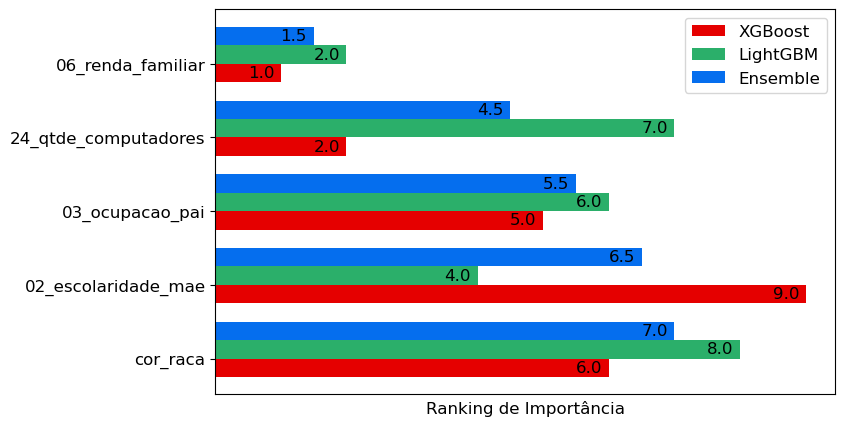

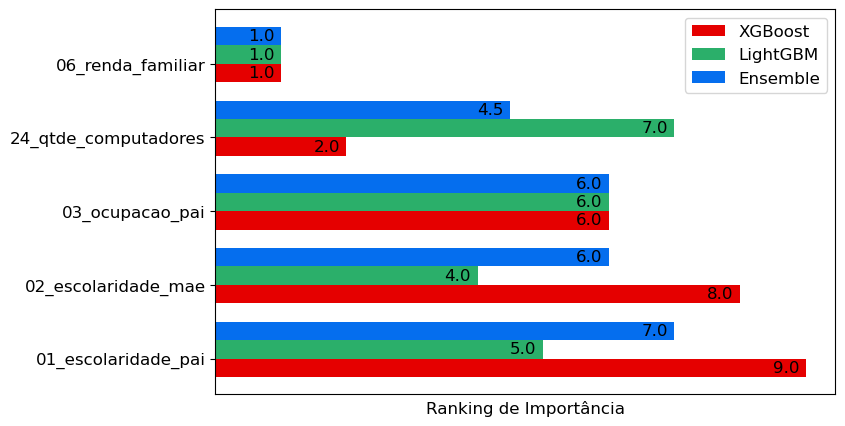

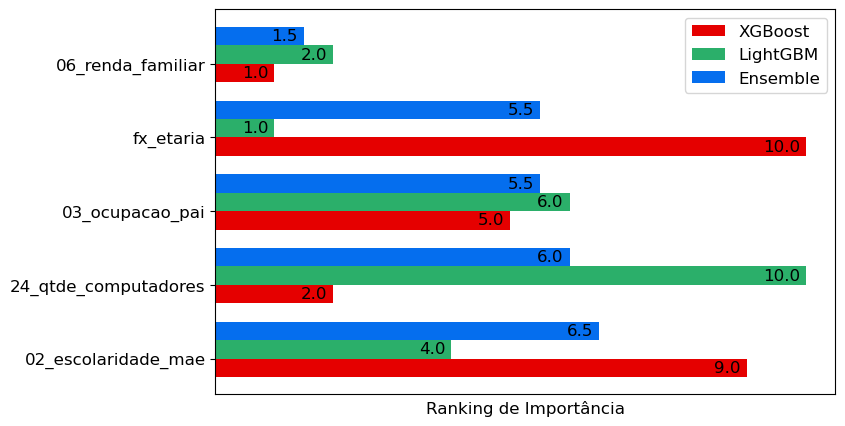

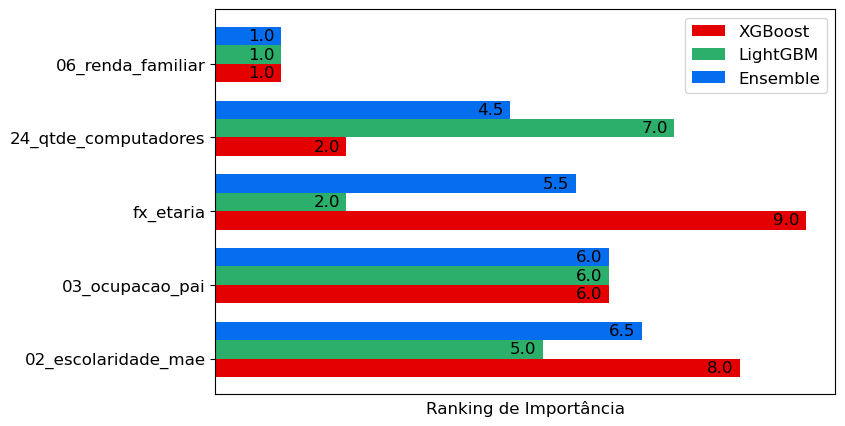

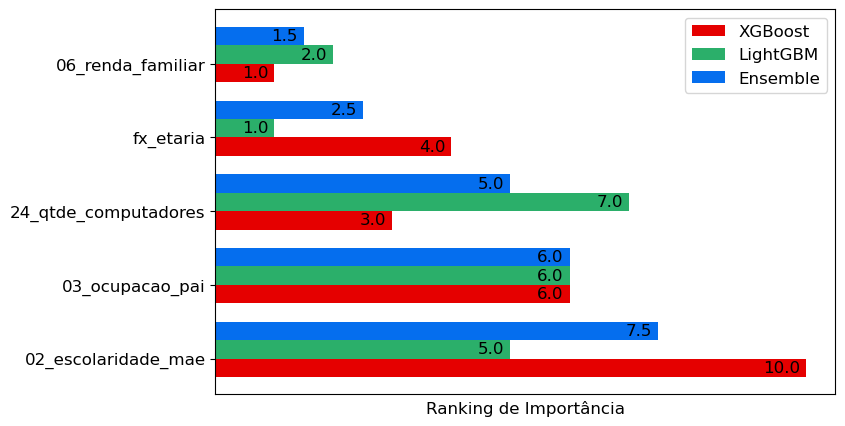

In [88]:
dc_nome_salvar = abre_arquivo_pickle('dc_nome_salvar.pkl')

for nome, df in dc_feature_importance_ensemble.items():

    df = df[['variavel', 'rank_importancia_xgb', 'rank_importancia_lgbm', 'rank_importancia_ensemble']].head(5).sort_values('rank_importancia_ensemble', ascending=False)

    plt.figure(figsize=(8, 5))

    plt.barh(
        [1 - 1/8, 2 - 1/8, 3 - 1/8, 4 - 1/8, 5 - 1/8],
        df['rank_importancia_xgb'],
        label='XGBoost',
        height=1/4,
        color='xkcd:red'
    )

    plt.barh(
        [1 + 1/8, 2 + 1/8, 3 + 1/8, 4 + 1/8, 5 + 1/8],
        df['rank_importancia_lgbm'],
        label='LightGBM',
        height=1/4,
        color='xkcd:jade green'
    )

    plt.barh(
        [1 + 3/8, 2 + 3/8, 3 + 3/8, 4 + 3/8, 5 + 3/8],
        df['rank_importancia_ensemble'],
        label='Ensemble',
        height=1/4,
        color='xkcd:cerulean blue'
    )

    plt.yticks([1, 2, 3, 4, 5], df['variavel'].str.replace('_num', ''), fontsize=12)
    plt.xticks([])

    plt.xlabel('Ranking de Importância', fontsize=12)

    for i, valor in enumerate(df['rank_importancia_xgb']):
        plt.text(valor - 0.1, i + 1 - 1/8, f'{valor:.1f}', va='center', ha='right', fontsize=12)

    for i, valor in enumerate(df['rank_importancia_lgbm']):
        plt.text(valor - 0.1, i + 1 + 1/8, f'{valor:.1f}', va='center', ha='right', fontsize=12)

    for i, valor in enumerate(df['rank_importancia_ensemble']):
        plt.text(valor - 0.1, i + 1 + 3/8, f'{valor:.1f}', va='center', ha='right', fontsize=12)

    plt.legend(fontsize=12, loc='upper right')

    plt.savefig(f"../texto/imagens/importancia_ensemble_{dc_nome_salvar[nome]}.png", dpi=300, bbox_inches='tight')

    plt.show()